In [1]:
import numpy as np
import matplotlib.image as mpimg
from matplotlib import pyplot as plt

In [2]:
addr = 'image.png'
# addr = input()

In [3]:
# Project Part 2:
def histogram(img):
    m, n = img.shape
    hist = [0.0] * 256
    
    for i in range(m): # column
        for j in range(n): # row
            hist[img[i, j]] += 1
    
    res = np.array(hist) / (m*n) # normalization
    return res

In [4]:
 # Project Part 4
def histEqualization(img, cumsum):
   
    func = np.uint8(255 * cumsum)
    
    m, n = img.shape
    res = np.zeros_like(img)
    
    for i in range(0, m):
        for j in range(0, n):
            res[i, j] = func[img[i, j]]
            
    return res, func

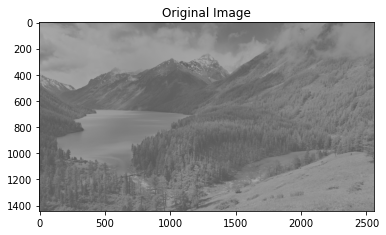

In [5]:
im = mpimg.imread(addr) * 255.0
img = np.uint8(im)

plt.imshow(img)
plt.title('Original Image')
plt.show()

In [6]:
# Project Part 1:
imgGray = np.uint8((0.299 * img[:,:,0]) + np.uint8(0.587 * img[:,:,1]) + np.uint8(0.114 * img[:,:,2]))

# plt.imshow(imgGray, cmap = 'gray')
# plt.title('Original grayscale Image')
# plt.show()

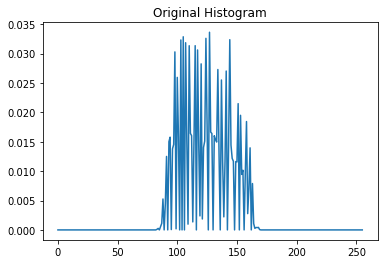

In [7]:
hist = histogram(imgGray)

plt.plot(hist)
plt.title('Original Histogram')
plt.show()

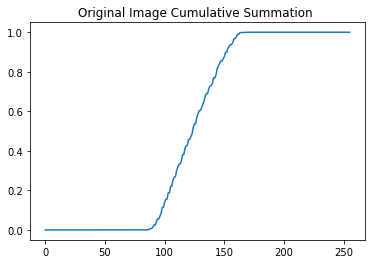

In [8]:
 # Project Part 3
cumsum = np.array([sum(hist[:i+1]) for i in range(len(hist))])

plt.plot(cumsum)
plt.title('Original Image Cumulative Summation ')

plt.show()

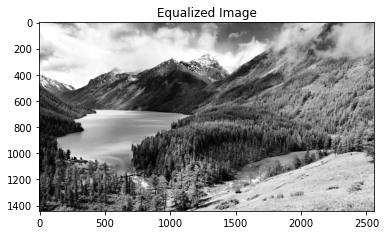

In [9]:
eq_img, func = histEqualization(imgGray, cumsum)

plt.imshow(eq_img, cmap = 'gray')
plt.title('Equalized Image')
plt.show()

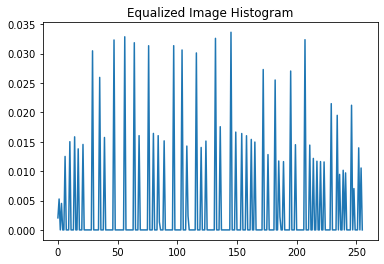

In [10]:
eq_hist = histogram(eq_img)

plt.plot(eq_hist)
plt.title('Equalized Image Histogram')
plt.show()

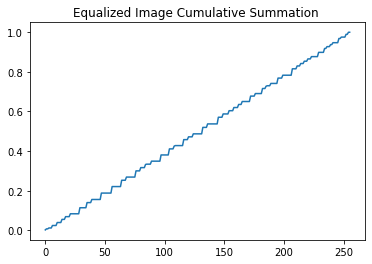

In [11]:
out_cumsum = np.array([sum(eq_hist[:i+1]) for i in range(len(eq_hist))])

plt.plot(out_cumsum)
plt.title('Equalized Image Cumulative Summation ')

plt.show()

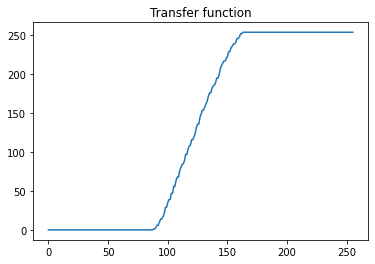

In [12]:
plt.plot(func)
plt.title('Transfer function')

plt.show()

In [13]:
from PIL import Image

# Project Part 5
im = Image.fromarray(eq_img)
im.save("EqualizedImage.png")